## Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Define the system matrices

In [2]:
A = np.array([[0, 1, 0],
              [0, 0, 4.438],
              [0, -12, -24]])
b1 = np.array([[0], [0], [20]])
b2 = np.array([[0], [-7.396], [0]])
B = np.hstack((b1, b2))
C = np.array([[1, 0, 0],
              [0, 1, 0]])
D = np.array([[0], [0]])

## Create the state space model of the DC motor

In [3]:
DC_motor = signal.StateSpace(A, b1, C, D)  # Note only first input is used

## Define the time vector

In [4]:
t = np.arange(0.0, 4.0, 0.01)

## Generate input signal u

In [5]:
u = 6 * signal.square(2 * np.pi * 0.25 * t) - 3

## Simulate the system

In [6]:
t, y, x = signal.lsim(DC_motor, u, t)

## Plot the result

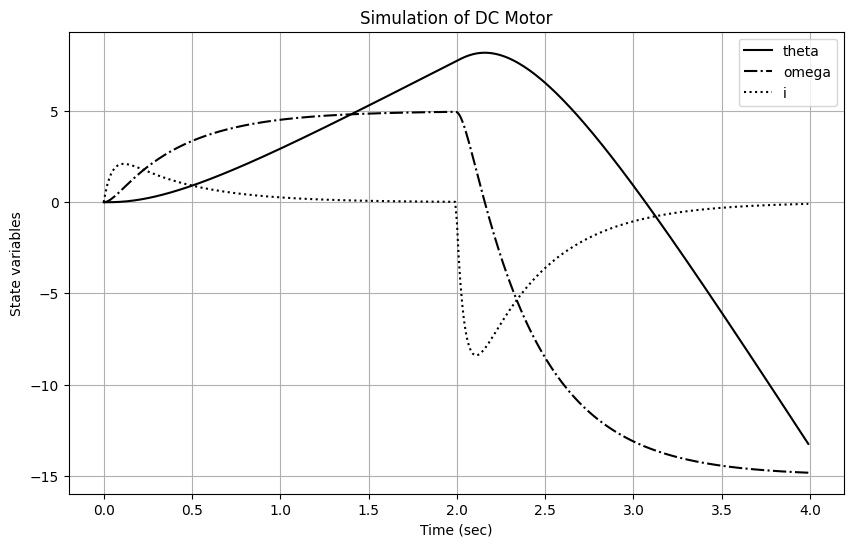

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(t, x[:, 0], 'k', label='theta')
plt.plot(t, x[:, 1], 'k-.', label='omega')
plt.plot(t, x[:, 2], 'k:', label='i')
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.title('Simulation of DC Motor')
plt.show()